In [3]:
import numpy as np
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import pylab
#import peakutils
#from peakutils.plot import plot as pplot
#from detect_peaks import detect_peaks
from decimal import *
from astropy.io import fits

# from specutils import Spectrum1D
import pkg_resources
from jovispec.abcio import read_qfits

In [2]:
### read spectra
def read_qfits(fitsnum,dir,ext="q"):
    #read scombined spectra                                                                                  
    getcontext().prec = 15
    pfits=dir+"/"+ext+fitsnum+".fits"
    hduread=fits.open(pfits)
    crval1=hduread[0].header["CRVAL1"]
    cd1_1=hduread[0].header["CD1_1"]
    data=hduread[0].data

    lamb=[]
    for i in range(0,len(data)):
        lamtmp=Decimal(crval1)+i*Decimal(cd1_1)
        lamb.append(lamtmp)
    lamb=np.array(lamb)
    spec=np.array(data)
    hduread.close()

    return lamb, spec, hduread[0].header

In [4]:
jupiter_data = pkg_resources.resource_filename("jovispec", "jupiter_data")

lambc, specc, headc=read_qfits("06034",jupiter_data,ext="q")
lambw, specw, headw=read_qfits("06048",jupiter_data,ext="q")
lambe, spece, heade=read_qfits("06050",jupiter_data,ext="q")

rlambc, rspecc, rheadc=read_qfits("06033",jupiter_data,ext="q")
rlambw, rspecw, rheadw=read_qfits("06047",jupiter_data,ext="q")
rlambe, rspece, rheade=read_qfits("06049",jupiter_data,ext="q")

In [7]:
# H alpha
lambe_f = np.array([float(d) for d in lambe])

#js,je=np.digitize([6560.0,6566.0],map(float,lambe))
js,je=np.digitize([6560.0,6566.0],lambe_f)
emin=js+np.argmin(spece[js:je])
cmin=js+np.argmin(specc[js:je])
wmin=js+np.argmin(specw[js:je])

c=Decimal('299792.458')
Vhalpha=float((lambw[wmin]-lambe[emin])/lambc[cmin]*c)

In [9]:
Vhalpha

42.6507203561432

In [10]:
rlambe_f = np.array([float(d) for d in rlambe])

ks,ke=np.digitize([8640,8660],rlambe_f)
from detect_peaks import detect_peaks
inde = detect_peaks(-rspece[ks:ke]+0.1, mph=0.04, mpd=10)+ks
#indc = detect_peaks(-specc[ks:ke]+0.11, mph=0.05, mpd=10)+ks
indw = detect_peaks(-rspecw[ks:ke]*0.5+0.1, mph=0.0382, mpd=10)+ks
#Vch=float((lambw[indw[-1]]-lambe[inde[-1]])/lambc[indc[-1]]*c)
inde,indw

(array([51534, 51564, 51691, 51770, 51801, 51832, 51851, 51981, 51997,
        52024, 52042, 52086, 52116, 52166, 52227, 52323, 52394, 52411]),
 array([51563, 51592, 51719, 51798, 51829, 51840, 51861, 51880, 51968,
        52010, 52026, 52052, 52070, 52115, 52145, 52196, 52256, 52351]))

In [17]:
inde=np.array([51534, 51564, 51691, 51770, 51801, 51832, 51851, 51981, 51997,
        52024, 52042, 52086, 52116, 52166, 52227, 52323])

indw=np.array([51563, 51592, 51719, 51798, 51829, 51861, 51880,
        52010, 52026, 52052, 52070, 52115, 52145, 52196, 52256, 52351])

In [18]:
jj=10
Vch4=float((rlambw[indw[jj]]-rlambe[inde[jj]])/rlambc[int((inde[jj]-indw[jj])/2)]*c)
Vch4

21.1055200650181

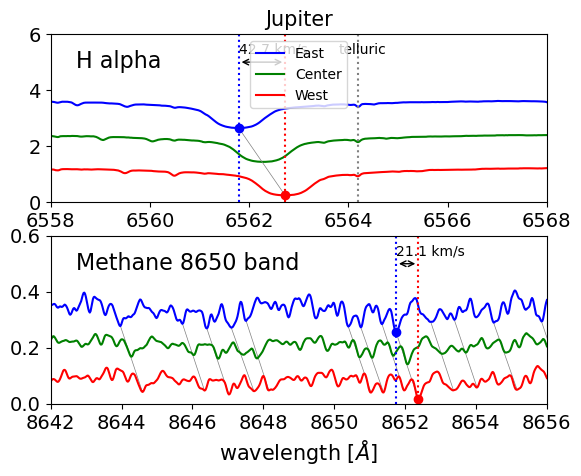

In [20]:
fig = plt.figure()
ax=fig.add_subplot(211)
pylab.xlim(6558,6568)
pylab.ylim(0,6.0)

ax.plot(lambe,spece*1.4+2.4,c="blue")
ax.plot(lambc,specc*1.8+1.2,c="green")
ax.plot(lambw,specw,c="red")
ax.plot([lambe[emin],lambw[wmin]], [spece[emin]*1.4+2.4,specw[wmin]],c="gray",lw=0.5) #connected line

ax.plot([lambe[emin]],[spece[emin]*1.4+2.4],"o",c="blue")
ax.plot([lambw[wmin]],[specw[wmin]],"o",c="red")

plt.annotate('', xy=(lambe[emin],5), xytext=(lambw[wmin],5), arrowprops=dict(arrowstyle='<->'))
plt.annotate('42.7 km/s', xy=(lambe[emin],5), xytext=(lambe[emin],5.3))
#ax.plot(lambw-(lambw[wmin]-lambe[emin]),specw)
#ax.plot(lambe,spece*1.4)
pylab.axvline(lambe[emin],ls="dotted",c="blue")
#pylab.axvline(lambc[cmin],ls="dotted",c="green")
pylab.axvline(lambw[wmin],ls="dotted",c="red")
pylab.axvline(6564.2,ls="dotted",c="gray")
plt.annotate('telluric', xy=(6563.8,5), xytext=(6563.8,5.3))

#pylab.xlabel("wavelength [$\AA$]", fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
pylab.legend(("East","Center","West"))
pylab.title("Jupiter", fontsize=15)
ax.annotate('H alpha', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=16)

ax=fig.add_subplot(212)
pylab.xlim(8642,8656)
pylab.ylim(0,0.6)
for j in range(0,len(inde)):
    ax.plot([rlambe[inde[j]],rlambw[indw[j]]], [rspece[inde[j]]+0.24,rspecw[indw[j]]*0.5],c="gray",lw=0.5) 
ax.plot(rlambe,rspece+0.24,c="blue")
ax.plot(rlambc,rspecc+0.12,c="green")
ax.plot(rlambw,rspecw*0.5,c="red")
pylab.axvline(rlambe[inde[jj]],ls="dotted",c="blue")
pylab.axvline(rlambw[indw[jj]],ls="dotted",c="red")
ax.plot([rlambe[inde[jj]]],[rspece[inde[jj]]+0.24],"o",c="blue")
ax.plot([rlambw[indw[jj]]],[rspecw[indw[jj]]*0.5],"o",c="red")
plt.annotate('', xy=(rlambe[inde[jj]],0.5), xytext=(rlambw[indw[jj]],0.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate('21.1 km/s', xy=(rlambe[inde[jj]],0.5), xytext=(rlambe[inde[jj]],0.53))
pylab.xlabel("wavelength [$\AA$]", fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#pylab.legend(("East","Center","West"))
ax.annotate('Methane 8650 band', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=16)
plt.savefig("jupref.pdf")
plt.show()

In [89]:
# ~ 4 Vrot

In [21]:
# other stellar lines ?
ks,ke=np.digitize([6490,6502],lambe_f)
from detect_peaks import detect_peaks
inde = detect_peaks(-spece[ks:ke]/1.8*1.5+1, mph=0.45, mpd=10)+ks
indc = detect_peaks(-specc[ks:ke]+1, mph=0.5, mpd=10)+ks
indw = detect_peaks(-specw[ks:ke]/1.8+1, mph=0.45, mpd=10)+ks
Vam=float((lambw[indw[-1]]-lambe[inde[-1]])/lambc[indc[-1]]*c)

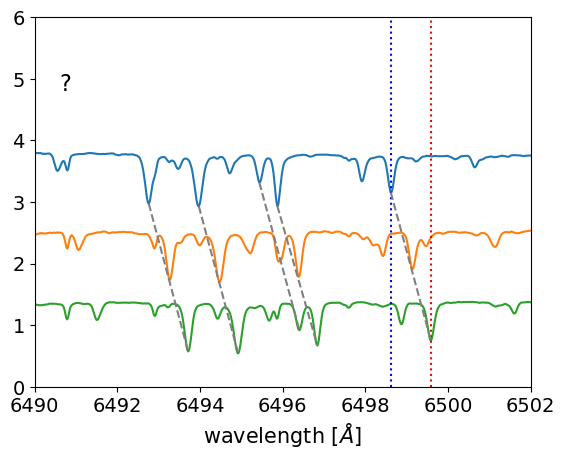

In [22]:
fig = plt.figure()
ax=fig.add_subplot(111)
pylab.xlim(6490,6502)
pylab.ylim(0,6.0)
ax.plot(lambe,spece*1.4+2.4)
ax.plot(lambc,specc*1.8+1.2)
ax.plot(lambw,specw)
pylab.axvline(lambe[inde[-1]],ls="dotted",c="blue")
#pylab.axvline(lambc[cmin],ls="dotted",c="green")
pylab.axvline(lambw[indw[-1]],ls="dotted",c="red")
for j in range(0,5):
    ax.plot([lambe[inde[j]],lambw[indw[j]]], [spece[inde[j]]*1.4+2.4,specw[indw[j]]],c="gray",ls="dashed") 
#ax.plot(lambe[inde],spece[inde]*1.4+2.4,".",c="blue")
#ax.plot(lambc[indc],specc[indc]*1.8+1.2,".",c="green")
#ax.plot(lambw[indw],specw[indw],".",c="red")
pylab.axvline(lambe[emin],ls="dashed",c="blue")
pylab.axvline(lambc[cmin],ls="dotted",c="green")
pylab.axvline(lambw[wmin],ls="dashed",c="red")
pylab.xlabel("wavelength [$\AA$]", fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#pylab.legend(("East","Center","West"))
ax.annotate('?', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=16)

plt.show()
